In [1]:
import sys
sys.path.append('/NDDepth/src')

In [2]:
from PIL import Image
import torch
import tqdm
from torch.utils.data import DataLoader
import torch.nn.functional as F

import matplotlib.pyplot as plt
from model import Model, ModelConfig
from dataloader.BaseDataloader import BaseImageDataset
from dataloader.NYUDataloader import NYUImageData

#torch.manual_seed(42)
MODEL_PATH = "./model.pth"
BATCH_SIZE = 8

device = "cuda:0"

test_dataset = BaseImageDataset('test', NYUImageData, '/scratchdata/nyu_depth_v2/official_splits/test', '/NDDepth/src/nyu_test.csv')
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


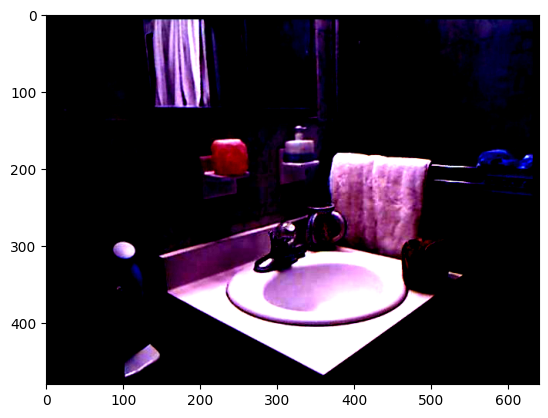

In [3]:
for i, data in enumerate(test_dataloader):
    break
plt.imshow(data["pixel_values"][0].squeeze().permute(1, 2, 0))

In [4]:
config =  ModelConfig("tiny07")
config.batch_size = BATCH_SIZE
config.height = 480//4
config.width = 640//4
model = Model(config).to(device)
model.backbone.backbone.from_pretrained("microsoft/swinv2-tiny-patch4-window8-256")
model.load_state_dict(torch.load(MODEL_PATH, weights_only=True))

<All keys matched successfully>

In [5]:
for k in data.keys(): data[k] = data[k].to(device)
d1_list, u1, d2_list, u2, norm_est, dist_est = model(data)

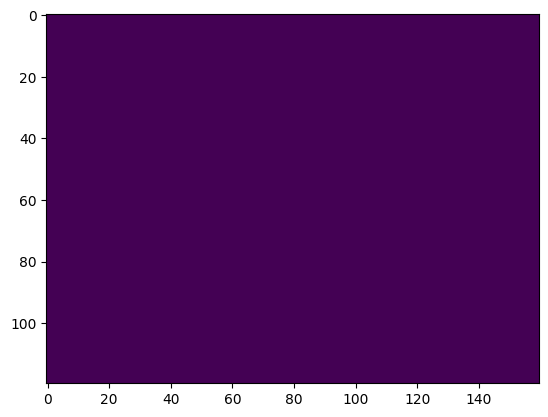

In [9]:
plt.imshow(d2_list[3][0].cpu().detach().squeeze())